FM Assignment Group 1

Harrshit Limbodia	        2019B4A40815H

Ninaad Pinakin Thakkar 	  2019B4A40872H

Gautam Gupta             	2019B2A41118H

Karan Moza 	              2019B4A71372H

Khushi Khanna 	          2019B4A10850H

Aryaa Bharani	            2019B1A11556H

Abhimanyu Singh Rana	    2019B3A80701H

Ankur Pandey	            2019B2A10777H



In [5]:
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 29.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# CALCULATING RETURNS FOR NIFTY50


In [6]:
niftydf = yf.download('^NSEI',start='2018-07-01', 
                      end='2022-07-01', 
                      progress=False,interval ='1mo',
)
niftydf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-01,10732.349609,11366.000000,10604.650391,11356.500000,11356.500000,4648500
2018-08-01,11359.799805,11760.200195,11234.950195,11680.500000,11680.500000,4923000
2018-09-01,11751.799805,11751.799805,10850.299805,10930.450195,10930.450195,5151800
2018-10-01,10930.900391,11035.650391,10004.549805,10386.599609,10386.599609,7030800
2018-11-01,10441.700195,10922.450195,10341.900391,10876.750000,10876.750000,5318400


In [7]:
niftydf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-01,16593.099609,17559.800781,15671.450195,17464.750000,17464.750000,7959500
2022-04-01,17436.900391,18114.650391,16824.699219,17102.550781,17102.550781,5658100
2022-05-01,16924.449219,17132.849609,15735.750000,16584.550781,16584.550781,6343200
2022-06-01,16594.400391,16793.849609,15183.400391,15780.250000,15780.250000,5514100
2022-07-01,15703.700195,16275.500000,15511.049805,15966.650391,15966.650391,2454500


In [8]:
niftydf.dropna(inplace=True)

In [9]:
niftydf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2018-07-01 to 2022-07-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       49 non-null     float64
 1   High       49 non-null     float64
 2   Low        49 non-null     float64
 3   Close      49 non-null     float64
 4   Adj Close  49 non-null     float64
 5   Volume     49 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 2.7 KB


# Log adjusted returns calculation as follows

In [10]:
niftydf['Return_NSE'] = np.log(niftydf['Adj Close']/niftydf['Adj Close'].shift(1))

In [11]:
niftydf.dropna(inplace=True)

In [12]:
niftydf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-08-01 to 2022-07-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        48 non-null     float64
 1   High        48 non-null     float64
 2   Low         48 non-null     float64
 3   Close       48 non-null     float64
 4   Adj Close   48 non-null     float64
 5   Volume      48 non-null     int64  
 6   Return_NSE  48 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.0 KB


In [13]:
nseret=niftydf['Return_NSE']

# CALCULATING RETURNS AND BETA FOR TARGET COMPANY YESBANK

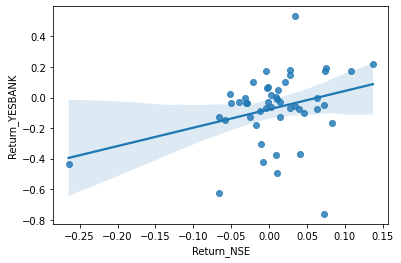

In [14]:
yesbankdf = yf.download('YESBANK.NS', 
                      start='2018-07-01', 
                      end='2022-07-01', 
                      progress=False,interval ='1mo'
)
yesbankdf.dropna(axis=0,inplace=True)
yesbankdf['Return_YESBANK'] = np.log(yesbankdf['Adj Close']/yesbankdf['Adj Close'].shift(1))
yesbankdf.dropna(axis=0,inplace=True)
yesbankret=yesbankdf['Return_YESBANK']
returnsyesbank=pd.merge(nseret,yesbankret,how='inner',on='Date')
x = returnsyesbank['Return_NSE']
y = returnsyesbank['Return_YESBANK']
x_sm = sm.add_constant(x)
model = sm.OLS(y,x_sm)
results = model.fit()
sns.regplot(x = 'Return_NSE', y = 'Return_YESBANK', data = returnsyesbank)
betayesbank=results.params[1]

In [15]:
betayesbank

1.2018438771850888

In [16]:
results.f_pvalue

0.0288181858497048

# Beta is 1.20 and statistically significant as p value<0.05

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Return_YESBANK   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     5.093
Date:                Thu, 14 Jul 2022   Prob (F-statistic):             0.0288
Time:                        17:55:34   Log-Likelihood:                 5.7659
No. Observations:                  48   AIC:                            -7.532
Df Residuals:                      46   BIC:                            -3.789
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0772      0.032     -2.423      0.019      -0.141      -0.013
Return_NSE     1.2018      0.533      2.257      0.029       0.130       2.274
==============================================================================
Omnibus:                       16.585   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.046
Skew:                          -1.064   Prob(JB):                     3.64e-06
Kurtosis:                       5.828   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
rfr=0.0516 ##91 day tbill rate as of 1st July

In [19]:
avgmarketreturn=nseret.mean()
avgmarketreturnannualised=avgmarketreturn*12
avgmarketreturnannualised

0.08517798228565018

#Cost of equity calculation using CAPM model

In [20]:
costofequity_topdown=rfr+betayesbank*(avgmarketreturnannualised-rfr)

In [21]:
costofequity_topdown

0.09195549241823806

# Comparable 1- ICICI BANK

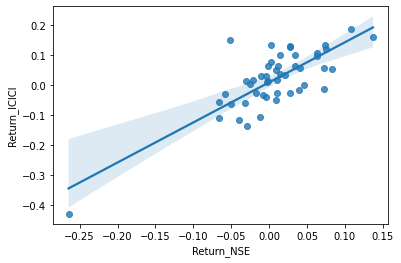

In [22]:
icicidf = yf.download('ICICIBANK.NS', 
                      start='2018-07-01', 
                      end='2022-07-01', 
                      progress=False,interval ='1mo'
)
icicidf.dropna(axis=0,inplace=True)
icicidf['Return_ICICI'] = np.log(icicidf['Adj Close']/icicidf['Adj Close'].shift(1))
icicidf.dropna(axis=0,inplace=True)
iciciret=icicidf['Return_ICICI']
returnsicici=pd.merge(nseret,iciciret,how='inner',on='Date')
x = returnsicici['Return_NSE']
y = returnsicici['Return_ICICI']
x_sm = sm.add_constant(x)
model = sm.OLS(y,x_sm)
results = model.fit()
sns.regplot(x = 'Return_NSE', y = 'Return_ICICI', data = returnsicici)
betaicici=results.params[1]

In [23]:
betaicici

1.3365466778922062

# Comparable 2- HDFC Bank

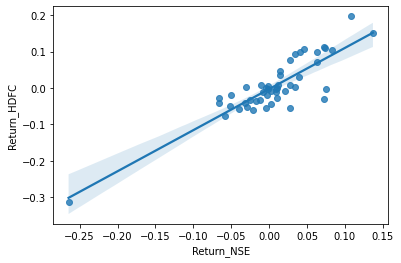

In [24]:
hdfcdf = yf.download('HDFCBANK.NS', 
                      start='2018-07-01', 
                      end='2022-07-01', 
                      progress=False,interval ='1mo'
)
hdfcdf.dropna(axis=0,inplace=True)
hdfcdf['Return_HDFC'] = np.log(hdfcdf['Adj Close']/hdfcdf['Adj Close'].shift(1))
hdfcdf.dropna(axis=0,inplace=True)
hdfcret=hdfcdf['Return_HDFC']
returnshdfc=pd.merge(nseret,hdfcret,how='inner',on='Date')
x = returnshdfc['Return_NSE']
y = returnshdfc['Return_HDFC']
x_sm = sm.add_constant(x)
model = sm.OLS(y,x_sm)
results = model.fit()
sns.regplot(x = 'Return_NSE', y = 'Return_HDFC', data = returnshdfc)
betahdfc=results.params[1]

In [25]:
betahdfc

1.129127681734625

# Comparable 3- Kotak Mahindra Bank

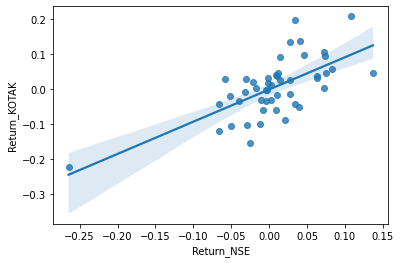

In [26]:
kmbdf = yf.download('KOTAKBANK.NS', 
                      start='2018-07-01', 
                      end='2022-07-01', 
                      progress=False,interval ='1mo'
)
kmbdf.dropna(axis=0,inplace=True)
kmbdf['Return_KOTAK'] = np.log(kmbdf['Adj Close']/kmbdf['Adj Close'].shift(1))
kmbdf.dropna(axis=0,inplace=True)
kmbret=kmbdf['Return_KOTAK']
returnskmb=pd.merge(nseret,kmbret,how='inner',on='Date')
x = returnskmb['Return_NSE']
y = returnskmb['Return_KOTAK']
x_sm = sm.add_constant(x)
model = sm.OLS(y,x_sm)
results = model.fit()
sns.regplot(x = 'Return_NSE', y = 'Return_KOTAK', data = returnskmb)
betakmb=results.params[1]

In [27]:
betakmb

0.9228489023029329

# Comparable 4- Axis Bank

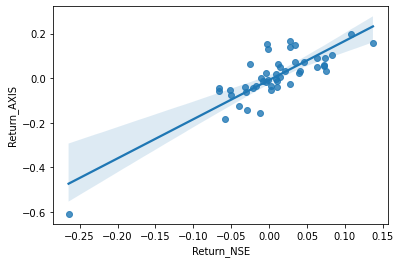

In [28]:
axisdf = yf.download('AXISBANK.NS', 
                      start='2018-07-01', 
                      end='2022-07-01', 
                      progress=False,interval ='1mo'
)
axisdf.dropna(axis=0,inplace=True)
axisdf['Return_AXIS'] = np.log(axisdf['Adj Close']/axisdf['Adj Close'].shift(1))
axisdf.dropna(axis=0,inplace=True)
axisret=axisdf['Return_AXIS']
returnsaxis=pd.merge(nseret,axisret,how='inner',on='Date')
x = returnsaxis['Return_NSE']
y = returnsaxis['Return_AXIS']
x_sm = sm.add_constant(x)
model = sm.OLS(y,x_sm)
results = model.fit()
sns.regplot(x = 'Return_NSE', y = 'Return_AXIS', data = returnsaxis)
betaaxis=results.params[1]

In [29]:
betaaxis

1.7593414813752184

In [30]:
betayesbank

1.2018438771850888

In [31]:
betaicici

1.3365466778922062

In [32]:
betahdfc

1.129127681734625

In [33]:
betakmb

0.9228489023029329

In [34]:
betaaxis

1.7593414813752184

# Bottom up approach

market value of debt/ market value of equity has been variablised as mvdmveratio

Calculating Beta unlevered for comparable companies

In [35]:
mvdmveratio_icici=1620/5209.125
mvdmveratio_icici

0.310992729105176

#Corporate tax rate 25.17% is used for the tax rate

In [36]:
taxrate=0.2517

In [37]:
betaunlevered_icici=betaicici/(1+(1-taxrate)*mvdmveratio_icici)

In [38]:
betaunlevered_icici

1.08422932010551

In [39]:
mvdmveratio_hdfc=2270/7530
mvdmveratio_hdfc

0.301460823373174

In [40]:
betaunlevered_hdfc=betahdfc/(1+(1-taxrate)*mvdmveratio_hdfc)

In [41]:
betaunlevered_hdfc

0.9212983193800395

In [42]:
mvdmveratio_kmb=551.48/3452.4568
mvdmveratio_kmb

0.15973552514835235

In [43]:
betaunlevered_kmb=betakmb/(1+(1-taxrate)*mvdmveratio_kmb)

In [44]:
betaunlevered_kmb

0.8243180846025995

In [45]:
mvdmveratio_axis=2000/2087.1216
mvdmveratio_axis

0.958257535162302

In [46]:
betaunlevered_axis=betaaxis/(1+(1-taxrate)*mvdmveratio_axis)

In [47]:
betaunlevered_axis

1.0246218923797585

# Average Beta unlevered calculation:

In [48]:
avgbetaunlevered=(betaunlevered_axis+betaunlevered_hdfc+betaunlevered_icici+betaunlevered_kmb)/4

In [49]:
avgbetaunlevered

0.9636169041169769

# D/E for target company

In [50]:
mvdmveratio_yesbank=723.4/331.978

In [51]:
mvdmveratio_yesbank

2.1790600581966273

# Calculating Beta Levered for the target company

In [52]:
betayesbank_bottomup=avgbetaunlevered*(1+(1-taxrate)*mvdmveratio_yesbank)

In [53]:
betayesbank_bottomup

2.534881610008092

# Calculating Cost of equity for the target company using CAPM model for bottom up approach

In [54]:
costofequity_bottomup=rfr+betayesbank_bottomup*(avgmarketreturnannualised-rfr)

In [55]:
costofequity_bottomup

0.13671620979707214

Interest coverage ratio (ICR)= EBIT/Interest Expense for the target company

In [56]:
ICR=15441.59/12525.66

In [57]:
ICR

1.2327965153133646

The spread of the company as per the ICR is 10%. Ref: http://pages.stern.nyu.edu/~adamodar/New_Home_Page/valquestions/syntrating.htm

In [58]:
cds=0.1

# Finding the cost of debt = risk free rate + credit default spread

In [59]:
costofdebt=rfr+cds

In [60]:
costofdebt

0.1516

In [61]:
mvdmveratio_yesbank

2.1790600581966273

In [62]:
wdebt=mvdmveratio_yesbank/(mvdmveratio_yesbank+1)
wdebt

0.6854416142841712

In [63]:
weq=1/(mvdmveratio_yesbank+1)
weq

0.31455838571582884

# Finding the weighted average cost of capital using respective weights of debt and equity with their cost of capital

In [64]:
WACC=weq*costofequity_bottomup+wdebt*costofdebt
WACC

0.14691817898043397

# The weighted average cost of capital of the target company YESBANK via the bottom up approach is 14.7% and via the top down approach is 8.157%.